# Analyzing Restaurants in Ahmedabad

In [0]:
import requests
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import folium
import seaborn as sns
sns.set()

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
abad_df = pd.read_csv('drive/My Drive/abad_boroughs.csv')
abad_df

,Borough,Lat,Long
0,Bodakdev,23.0387,72.5119
1,Thaltej,23.0497,72.5117
2,Vastrapur,23.0350,72.5293
3,Prahlad Nagar,23.0120,72.5108
4,Navrangpura,23.0365,72.5611
5,Paldi,23.0112,72.5631
6,Chandkheda,23.1091,72.5849
7,Bopal,23.0337,72.4634
8,Satellite,23.0301,72.5178
9,Naranpura,23.0522,72.5497


In [4]:
abad_lat = 23.0225
abad_lng = 72.5714
map_abad = folium.Map(location=[abad_lat, abad_lng], zoom_start=12)

for lat, lng, borough in zip(abad_df['Lat'], abad_df['Long'], abad_df['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_abad)  
    
map_abad

In [0]:
CLIENT_ID = '4EDTWLS3HUX5C4BFIANTNTGN1VGNCDJDNPC5HX3KU2MKM3SP' # your Foursquare ID
CLIENT_SECRET = 'CN3MRIKHFLGVLQEJBLYRBEM0JBYQS1PCNEX0K4GAAEFQNZBN' # your Foursquare Secret
VERSION = '20190913' # Foursquare API version
category_id = '4d4b7105d754a06374d81259'
LIMIT = 50

In [6]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                lat, 
                lng, 
                radius,
                category_id,
                LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

abad_venues = getNearbyVenues(names=abad_df['Borough'],
                                   latitudes=abad_df['Lat'],
                                   longitudes=abad_df['Long']
                                  )
abad_venues

Bodakdev
Thaltej
Vastrapur
Prahlad Nagar
Navrangpura
Paldi
Chandkheda
Bopal
Satellite
Naranpura


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bodakdev,23.0387,72.5119,mad by tomatos,23.040277,72.512255,Indian Restaurant
1,Bodakdev,23.0387,72.5119,Canadian Donut Co.,23.038313,72.512854,Donut Shop
2,Bodakdev,23.0387,72.5119,Atithi,23.038102,72.513375,Indian Restaurant
3,Bodakdev,23.0387,72.5119,Gordhan Thal,23.035955,72.510946,Indian Restaurant
4,Bodakdev,23.0387,72.5119,Pizza Hut,23.040032,72.513010,Pizza Place
5,Bodakdev,23.0387,72.5119,Subway,23.038234,72.512828,Sandwich Place
6,Bodakdev,23.0387,72.5119,Danny's,23.035444,72.510566,Café
7,Bodakdev,23.0387,72.5119,Mocha,23.031982,72.511358,Café
8,Bodakdev,23.0387,72.5119,Honest Pav Bhaji,23.038429,72.512459,Vegetarian / Vegan Restaurant
9,Bodakdev,23.0387,72.5119,Choice Snack Bar,23.038196,72.513026,Fast Food Restaurant


In [7]:
abad_venues = abad_venues.drop(abad_venues.index[[1, 19,20,21, 25, 215, 213, 219, 221, 223, 235, 237, 238, 241, 240, 30, 33, 34, 35, 38,39, 42,44, 46, 51, 52, 54, 57, 58, 60,61,62,63,64,65,66,68, 70, 78,79, 89, 99, 102, 111, 113, 117, 122,130,131,136, 139,143, 190,191,192,195, 209]])
abad_venues.drop_duplicates()
abad_venues

,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bodakdev,23.0387,72.5119,mad by tomatos,23.040277,72.512255,Indian Restaurant
2,Bodakdev,23.0387,72.5119,Atithi,23.038102,72.513375,Indian Restaurant
3,Bodakdev,23.0387,72.5119,Gordhan Thal,23.035955,72.510946,Indian Restaurant
4,Bodakdev,23.0387,72.5119,Pizza Hut,23.040032,72.513010,Pizza Place
5,Bodakdev,23.0387,72.5119,Subway,23.038234,72.512828,Sandwich Place
6,Bodakdev,23.0387,72.5119,Danny's,23.035444,72.510566,Café
7,Bodakdev,23.0387,72.5119,Mocha,23.031982,72.511358,Café
8,Bodakdev,23.0387,72.5119,Honest Pav Bhaji,23.038429,72.512459,Vegetarian / Vegan Restaurant
9,Bodakdev,23.0387,72.5119,Choice Snack Bar,23.038196,72.513026,Fast Food Restaurant
10,Bodakdev,23.0387,72.5119,Gormoh restaurant,23.036596,72.516340,Indian Restaurant


In [8]:
abad_venues = abad_venues.reset_index(drop=True)
abad_venues

,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bodakdev,23.0387,72.5119,mad by tomatos,23.040277,72.512255,Indian Restaurant
1,Bodakdev,23.0387,72.5119,Atithi,23.038102,72.513375,Indian Restaurant
2,Bodakdev,23.0387,72.5119,Gordhan Thal,23.035955,72.510946,Indian Restaurant
3,Bodakdev,23.0387,72.5119,Pizza Hut,23.040032,72.513010,Pizza Place
4,Bodakdev,23.0387,72.5119,Subway,23.038234,72.512828,Sandwich Place
5,Bodakdev,23.0387,72.5119,Danny's,23.035444,72.510566,Café
6,Bodakdev,23.0387,72.5119,Mocha,23.031982,72.511358,Café
7,Bodakdev,23.0387,72.5119,Honest Pav Bhaji,23.038429,72.512459,Vegetarian / Vegan Restaurant
8,Bodakdev,23.0387,72.5119,Choice Snack Bar,23.038196,72.513026,Fast Food Restaurant
9,Bodakdev,23.0387,72.5119,Gormoh restaurant,23.036596,72.516340,Indian Restaurant


In [9]:
abad_venues = abad_venues.apply(lambda x: x.str.lower() if(x.dtype == 'object') else x)
abad_venues[(abad_venues.Venue == 'gwalia') & (abad_venues.Borough == 'prahlad nagar')].index[0]
abad_venues.at[87, 'Venue'] = "gwalia"
abad_venues[abad_venues['Venue'].str.contains("page")]
abad_venues.drop(abad_venues[(abad_venues.Venue == 'page one') & (abad_venues.Borough == 'satellite')].index, inplace=True)
abad_venues.shape

(186, 7)

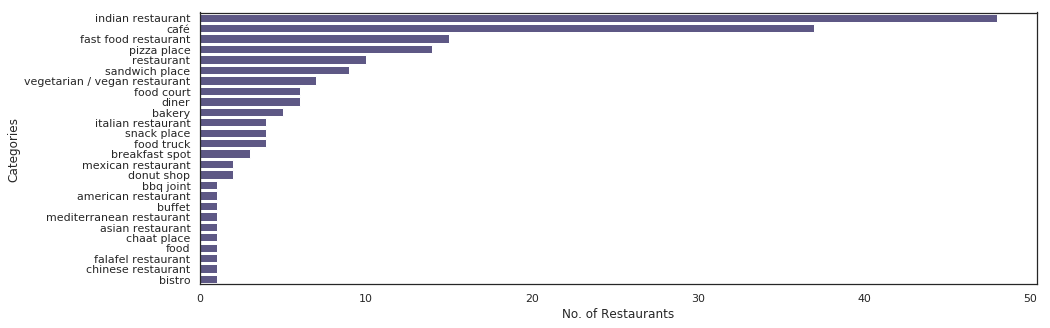

In [10]:
sns.set(rc={'figure.figsize':(15,5)})
sns.set(style="white")
category_plot = sns.barplot(x=abad_venues['Venue Category'].value_counts(), y=abad_venues['Venue Category'].value_counts().index, orient='h', color= '#58508d')
category_plot.set(xlabel='No. of Restaurants', ylabel='Categories')
category_plot

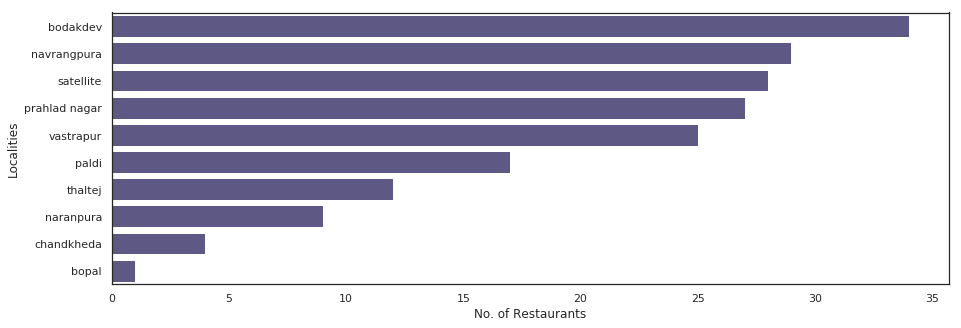

In [11]:
venue_plot = sns.barplot(x=abad_venues.Borough.value_counts(), y=abad_venues.Borough.value_counts().index, orient='h',color= '#58508d')
venue_plot.set(xlabel='No. of Restaurants', ylabel='Localities')
venue_plot

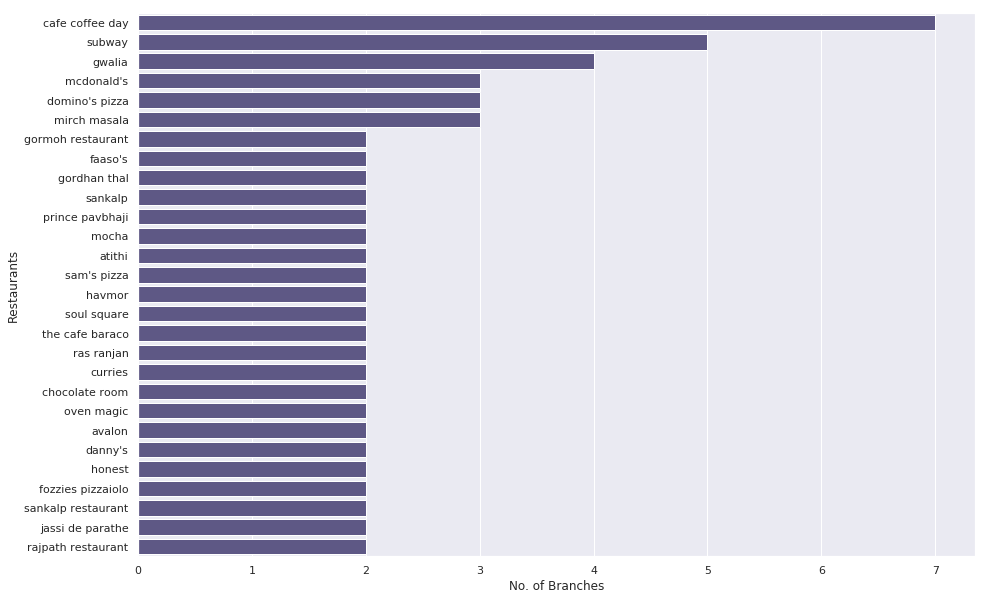

In [12]:
branch_venues = abad_venues.Venue.value_counts()
threshold = 1
mask = branch_venues > threshold
branch_venues = branch_venues.loc[mask]
sns.set(rc={'figure.figsize':(15,10)})

name_plot = sns.barplot(x=branch_venues, y=branch_venues.index, orient='h',color= '#58508d')
name_plot.set(xlabel='No. of Branches', ylabel='Restaurants')
name_plot

In [0]:
abad_cat = pd.get_dummies(abad_venues[['Venue Category']], prefix="", prefix_sep="")
abad_cat['Borough'] = abad_venues['Borough']
fixed_columns = [abad_cat.columns[-1]] + list(abad_cat.columns[:-1])
abad_cat = abad_cat[fixed_columns]

In [17]:
abad_grouped = abad_cat.groupby('Borough').mean().reset_index()
abad_grouped

,Borough,american restaurant,asian restaurant,bakery,bbq joint,bistro,breakfast spot,buffet,café,chaat place,chinese restaurant,diner,donut shop,falafel restaurant,fast food restaurant,food,food court,food truck,indian restaurant,italian restaurant,mediterranean restaurant,mexican restaurant,pizza place,restaurant,sandwich place,snack place,vegetarian / vegan restaurant
0,bodakdev,0.000000,0.000000,0.029412,0.000000,0.000000,0.000000,0.000000,0.205882,0.000000,0.000000,0.058824,0.000000,0.000000,0.029412,0.000000,0.029412,0.000000,0.352941,0.058824,0.000000,0.000000,0.117647,0.058824,0.029412,0.000000,0.029412
1,bopal,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
2,chandkheda,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.250000,0.250000,0.000000,0.000000,0.000000
3,naranpura,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.111111
4,navrangpura,0.000000,0.000000,0.034483,0.000000,0.000000,0.000000,0.000000,0.206897,0.000000,0.000000,0.000000,0.000000,0.034483,0.103448,0.034483,0.068966,0.034483,0.275862,0.000000,0.000000,0.000000,0.103448,0.000000,0.034483,0.068966,0.000000
5,paldi,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.117647,0.000000,0.000000,0.000000,0.000000,0.000000,0.176471,0.000000,0.000000,0.117647,0.235294,0.000000,0.000000,0.000000,0.058824,0.000000,0.117647,0.058824,0.117647
6,prahlad nagar,0.000000,0.000000,0.037037,0.037037,0.000000,0.037037,0.037037,0.148148,0.037037,0.000000,0.000000,0.037037,0.000000,0.148148,0.000000,0.000000,0.000000,0.222222,0.000000,0.000000,0.037037,0.037037,0.074074,0.074074,0.000000,0.037037
7,satellite,0.035714,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000,0.321429,0.000000,0.035714,0.035714,0.000000,0.000000,0.035714,0.000000,0.035714,0.035714,0.285714,0.035714,0.000000,0.000000,0.035714,0.035714,0.000000,0.000000,0.035714
8,thaltej,0.000000,0.000000,0.000000,0.000000,0.083333,0.083333,0.000000,0.166667,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.083333,0.083333,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000
9,vastrapur,0.000000,0.000000,0.040000,0.000000,0.000000,0.040000,0.000000,0.200000,0.000000,0.000000,0.000000,0.040000,0.000000,0.120000,0.000000,0.040000,0.000000,0.160000,0.000000,0.000000,0.040000,0.080000,0.120000,0.040000,0.040000,0.040000


In [18]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
abad_venues_sorted = pd.DataFrame(columns=columns)
abad_venues_sorted['Borough'] = abad_grouped['Borough']

for ind in np.arange(abad_grouped.shape[0]):
    abad_venues_sorted.iloc[ind, 1:] = return_most_common_venues(abad_grouped.iloc[ind, :], num_top_venues)

abad_venues_sorted.head()

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,bodakdev,indian restaurant,café,pizza place,restaurant,italian restaurant,diner,sandwich place,bakery,food court,fast food restaurant
1,bopal,pizza place,vegetarian / vegan restaurant,donut shop,asian restaurant,bakery,bbq joint,bistro,breakfast spot,buffet,café
2,chandkheda,indian restaurant,restaurant,pizza place,vegetarian / vegan restaurant,diner,asian restaurant,bakery,bbq joint,bistro,breakfast spot
3,naranpura,indian restaurant,café,vegetarian / vegan restaurant,diner,sandwich place,asian restaurant,food court,bakery,bbq joint,bistro
4,navrangpura,indian restaurant,café,pizza place,fast food restaurant,food court,snack place,sandwich place,bakery,food truck,food
